In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.



In [2]:
startup= pd.read_csv('50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup.corr()

C:\Users\navar\AppData\Local\Temp\ipykernel_24380\3738905581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


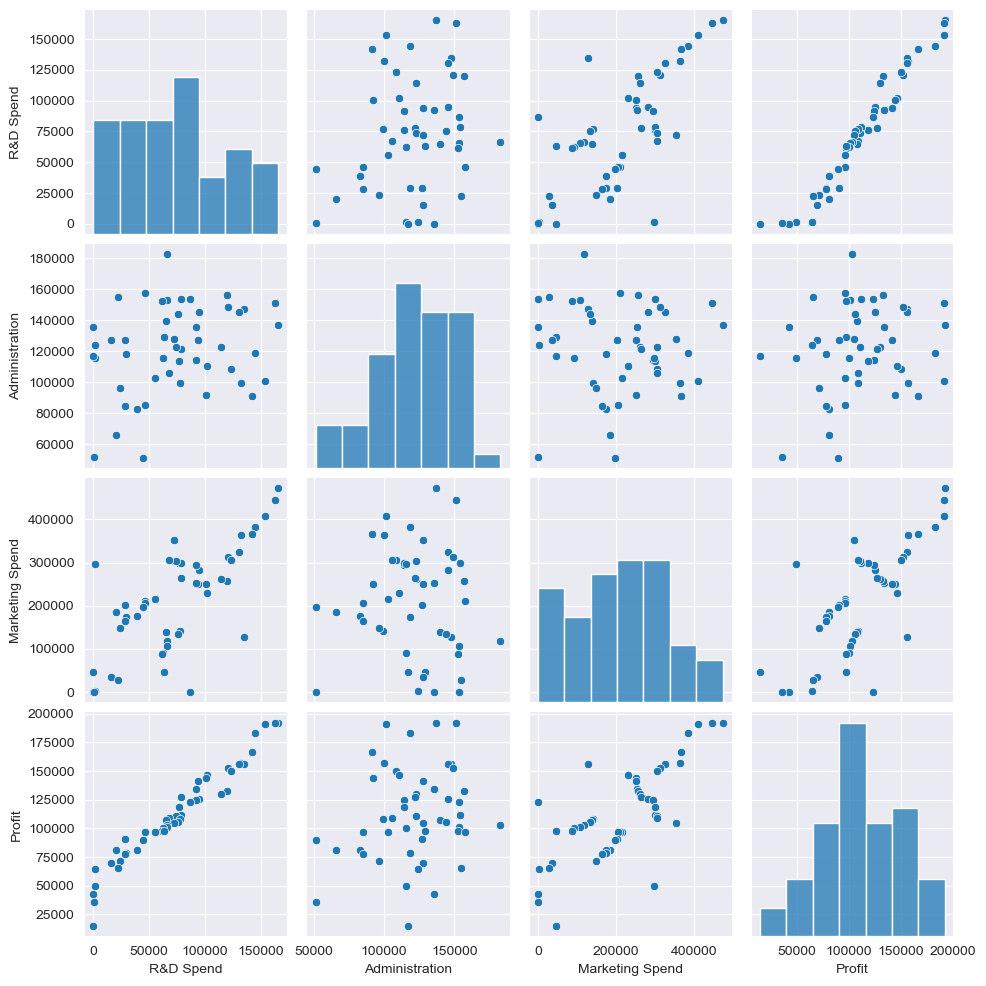

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [7]:
startup1=startup.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startup1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDS+ADMS+MKTS',data=startup1).fit()

In [9]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        15:09:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
ml_R=smf.ols('Profit~MKTS',data =startup1).fit()  
print(ml_R.tvalues, '\n', ml_R.pvalues)

Intercept    7.808356
MKTS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [12]:
ml_A=smf.ols("Profit~ADMS",data=startup1).fit()
ml_A.tvalues , ml_A.pvalues  

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [13]:
ml_RM=smf.ols("Profit~ADMS+MKTS",data=startup1).fit()  
print(ml_RM.tvalues, '\n', ml_RM.pvalues)  

Intercept    1.142741
ADMS         2.467779
MKTS         8.281039
dtype: float64 
 Intercept    2.589341e-01
ADMS         1.729198e-02
MKTS         9.727245e-11
dtype: float64


Calculating VIF

In [14]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=startup1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=startup1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=startup1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


Residual Analysis


Test for Normality of Residuals (Q-Q Plot)


import statsmodels.api as sm qqplot=sm.qqplot(model.resid,line='q') # plt.title("Normal Q-Q plot of residuals") plt.show()



In [15]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

Residual Plot for Homoscedasticity

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

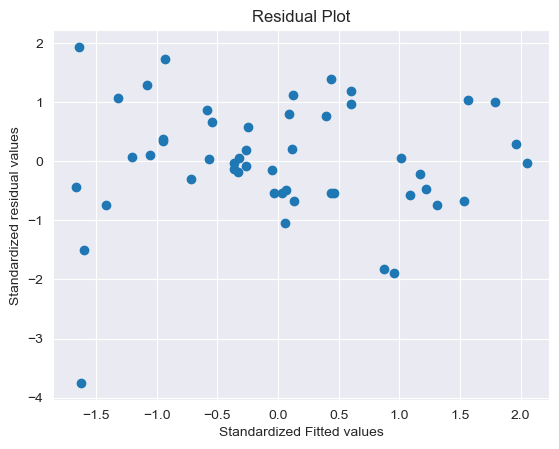

In [17]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

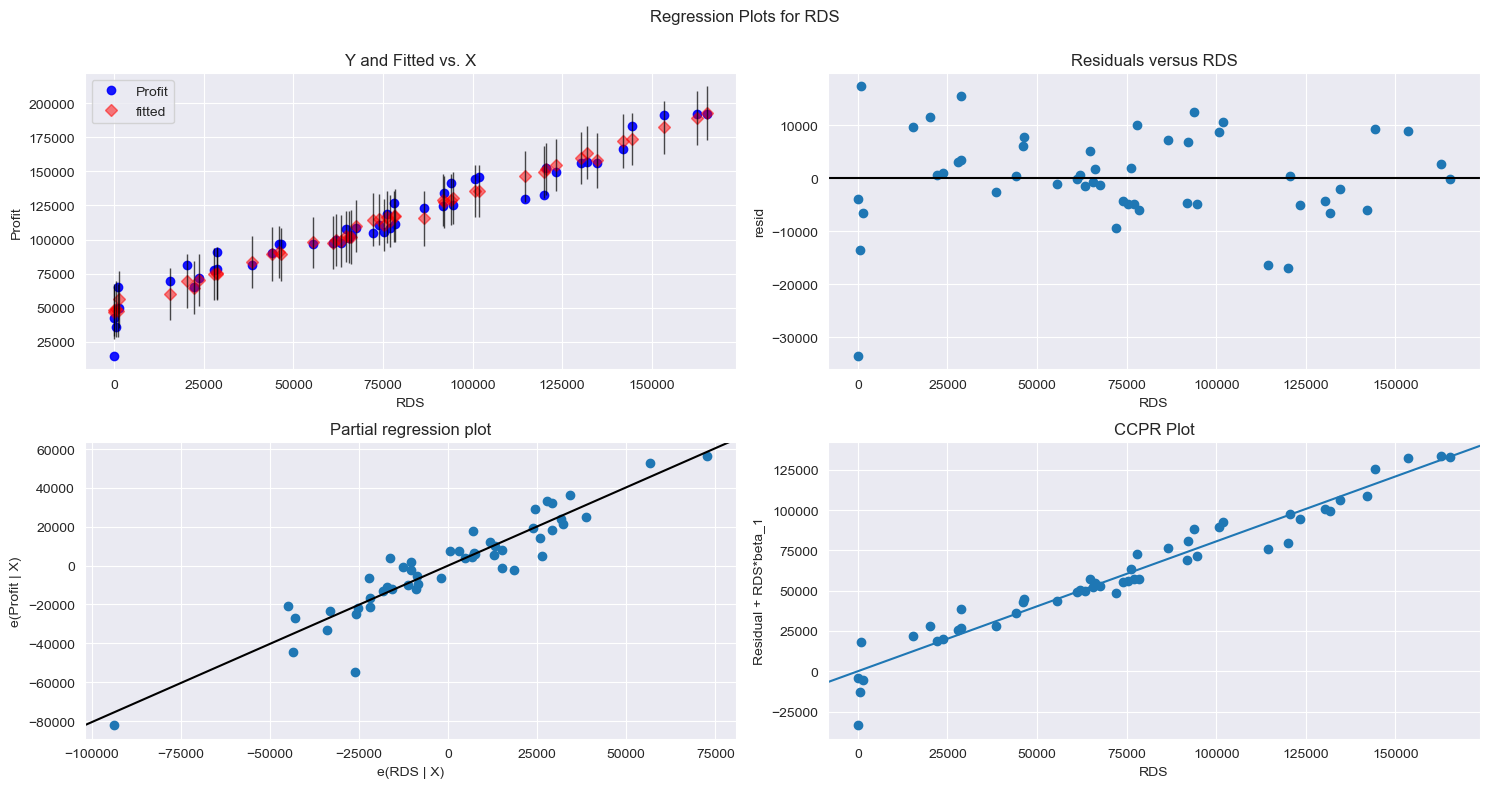

In [18]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

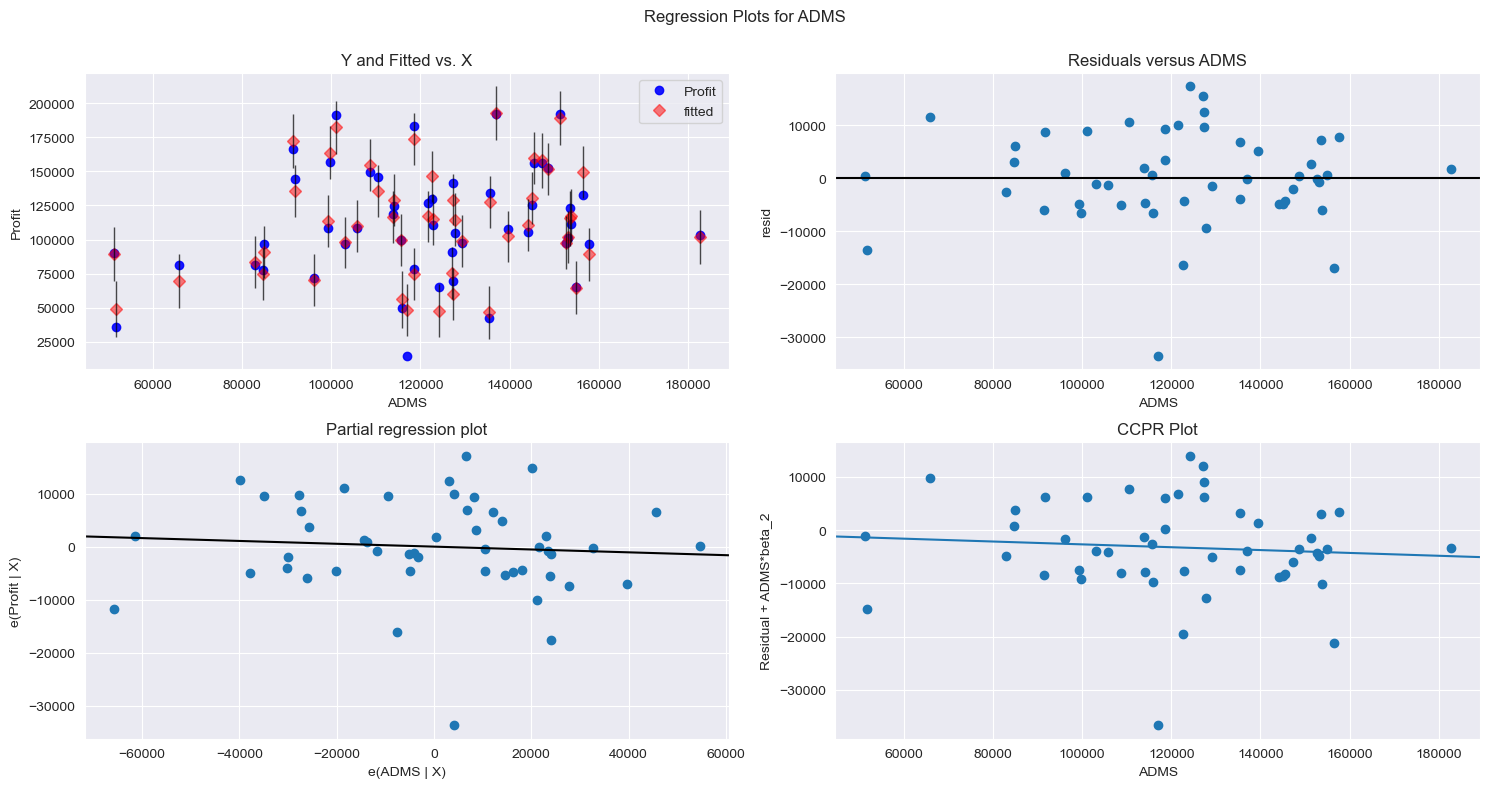

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

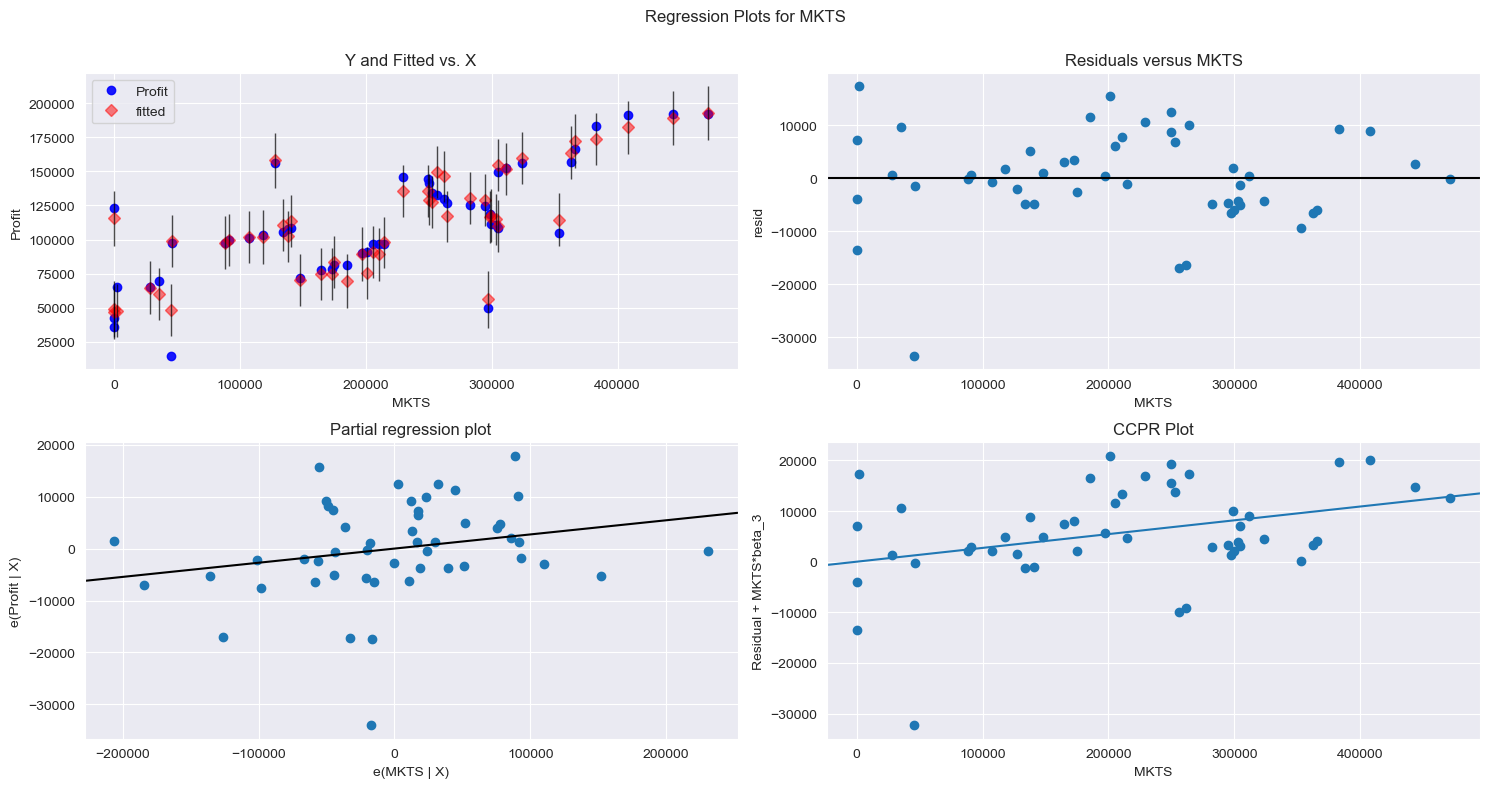

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKTS", fig=fig)
plt.show()

 Model Deletion Diagnostics

Detecting Influencers/Outliers

Cook’s Distance



In [21]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

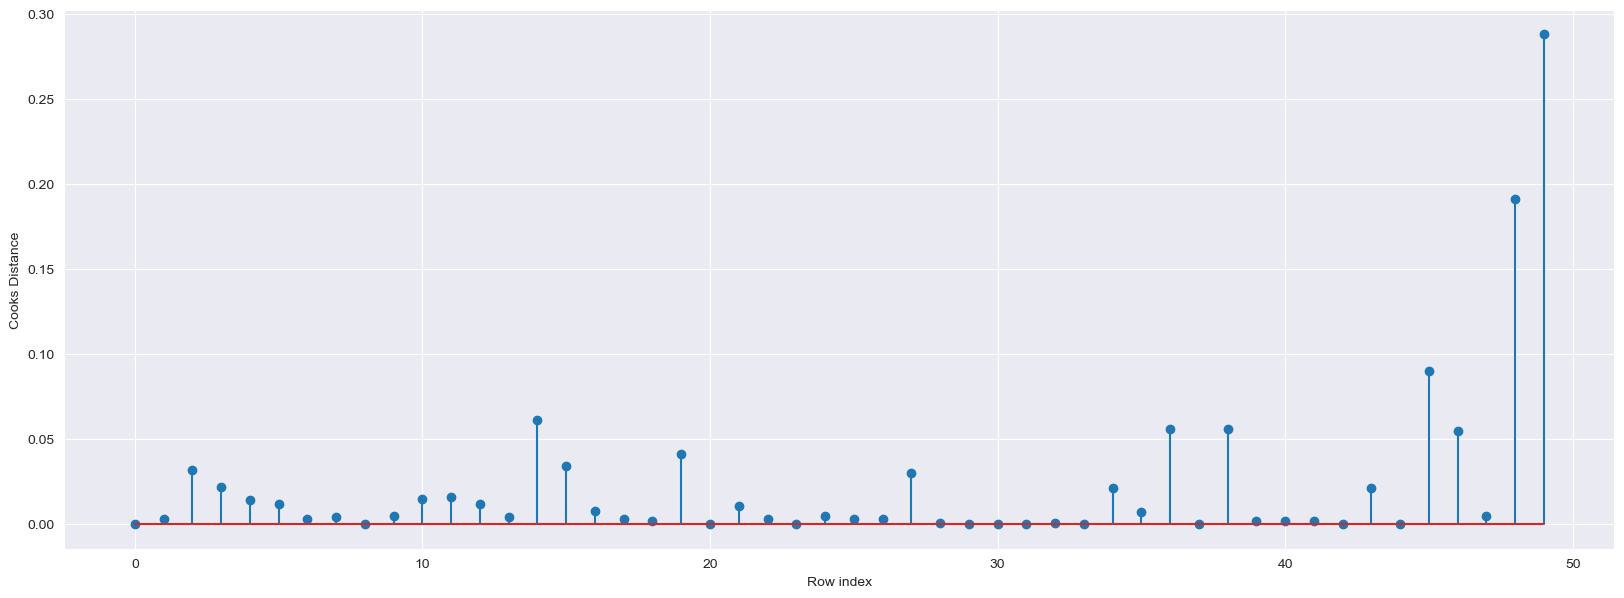

In [22]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

High Influence points


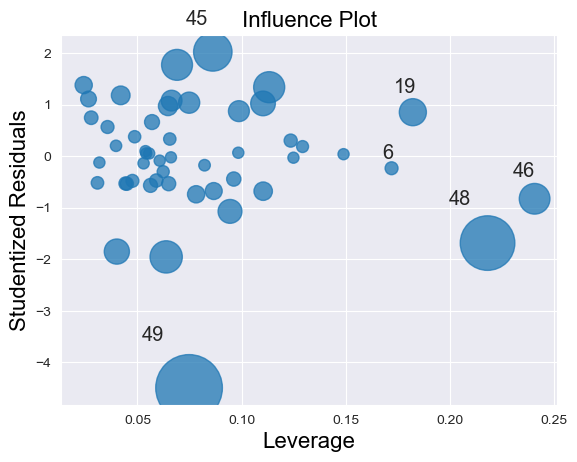

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [25]:
k=startup1.shape[1]
n=startup1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff


0.36

In [26]:
startup1[startup1.index.isin([49])] 

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [27]:
startup2=startup1.drop(startup1.index[[49]],axis=0).reset_index(drop=True)
startup2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [28]:
#Build the model on the new data
final_ml_V=smf.ols('Profit~RDS+ADMS+MKTS',data=startup2).fit()

In [29]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance 

Text(0, 0.5, 'Cooks Distance')

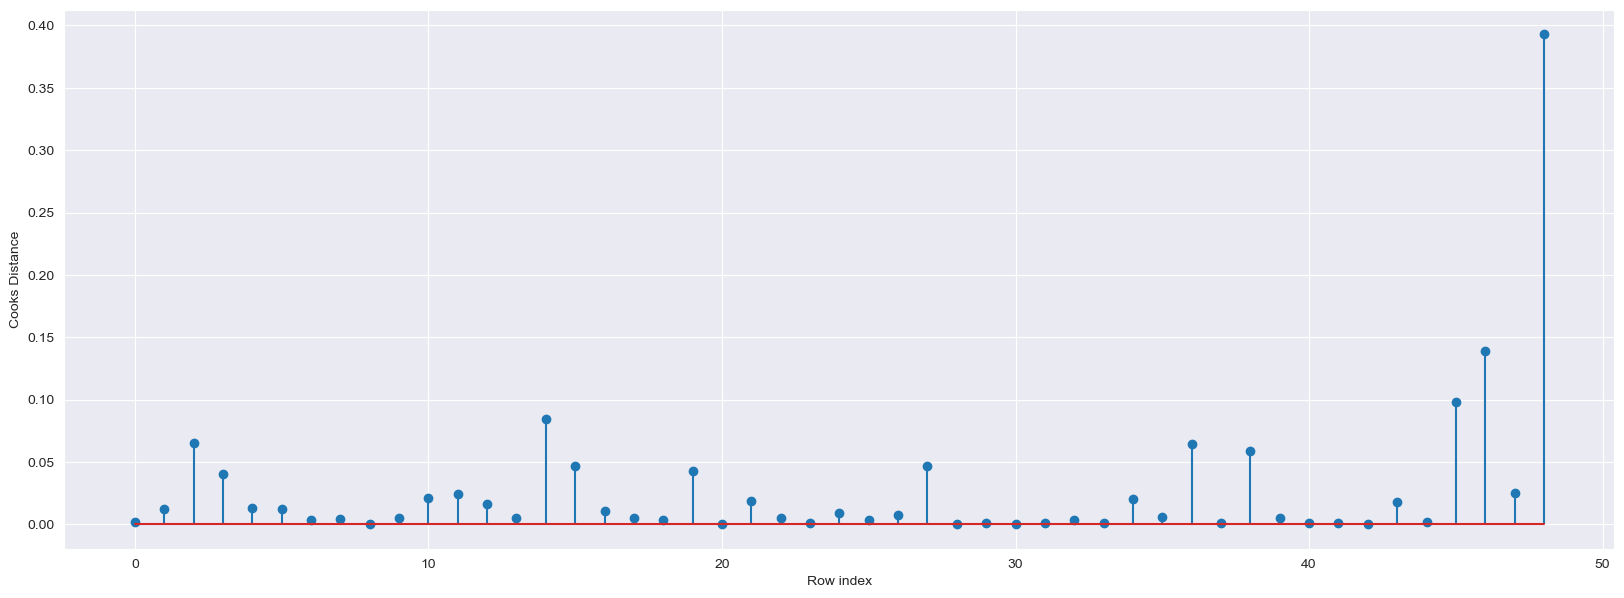

In [30]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup2)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [31]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V)) 

(48, 0.39274420556321554)

In [32]:
startup3=startup2.drop(startup1.index[[48]],axis=0)

In [33]:
startup4=startup3.reset_index()
startup4

,index,RDS,ADMS,MKTS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
final_ml_V=smf.ols('Profit~RDS+ADMS+MKTS',data=startup4).fit()

In [35]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

Text(0, 0.5, 'Cooks Distance')

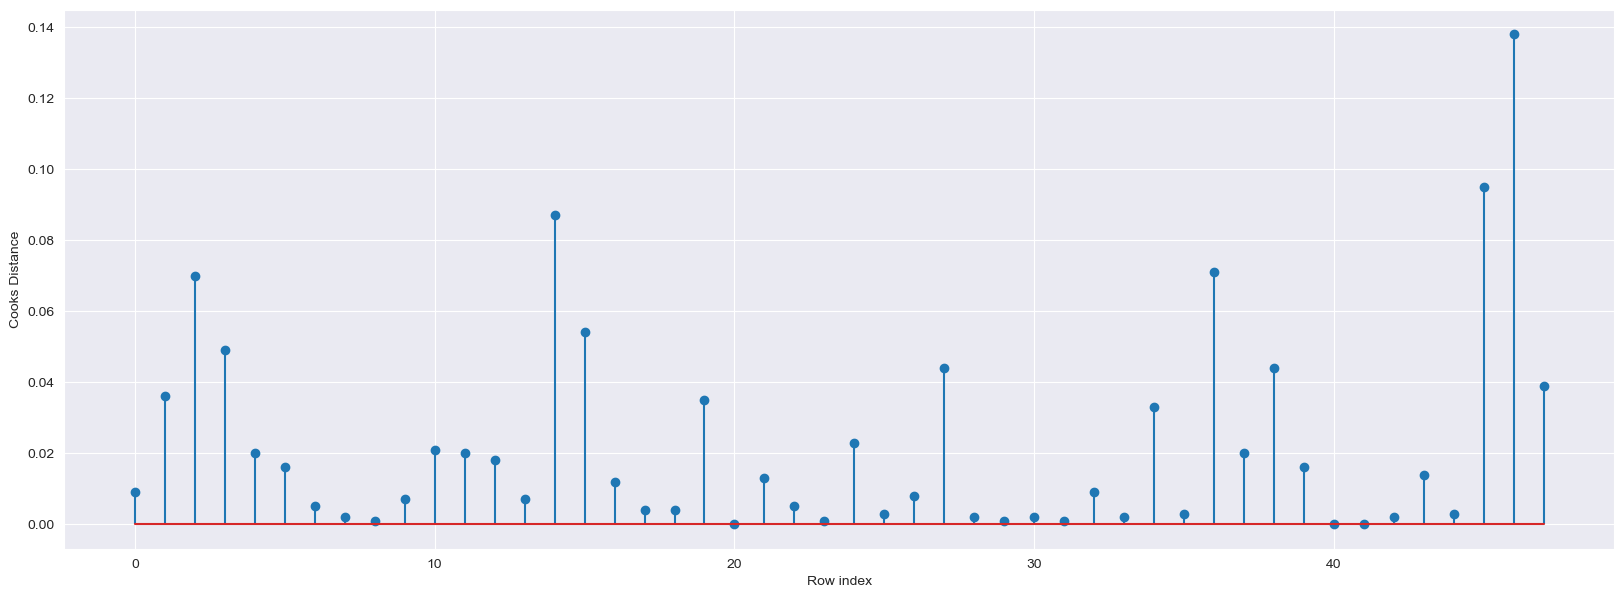

In [36]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup4)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [37]:
(np.argmax(c_V),np.max(c_V)) 

(46, 0.13829133994334772)

In [38]:
startup5=startup4.drop(startup1.index[[46]],axis=0)

In [39]:
startup6=startup5.reset_index()
startup6

,level_0,index,RDS,ADMS,MKTS,State,Profit
0,0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
final_ml_V=smf.ols('Profit~RDS+ADMS+MKTS',data=startup6).fit()

In [41]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance 

Text(0, 0.5, 'Cooks Distance')

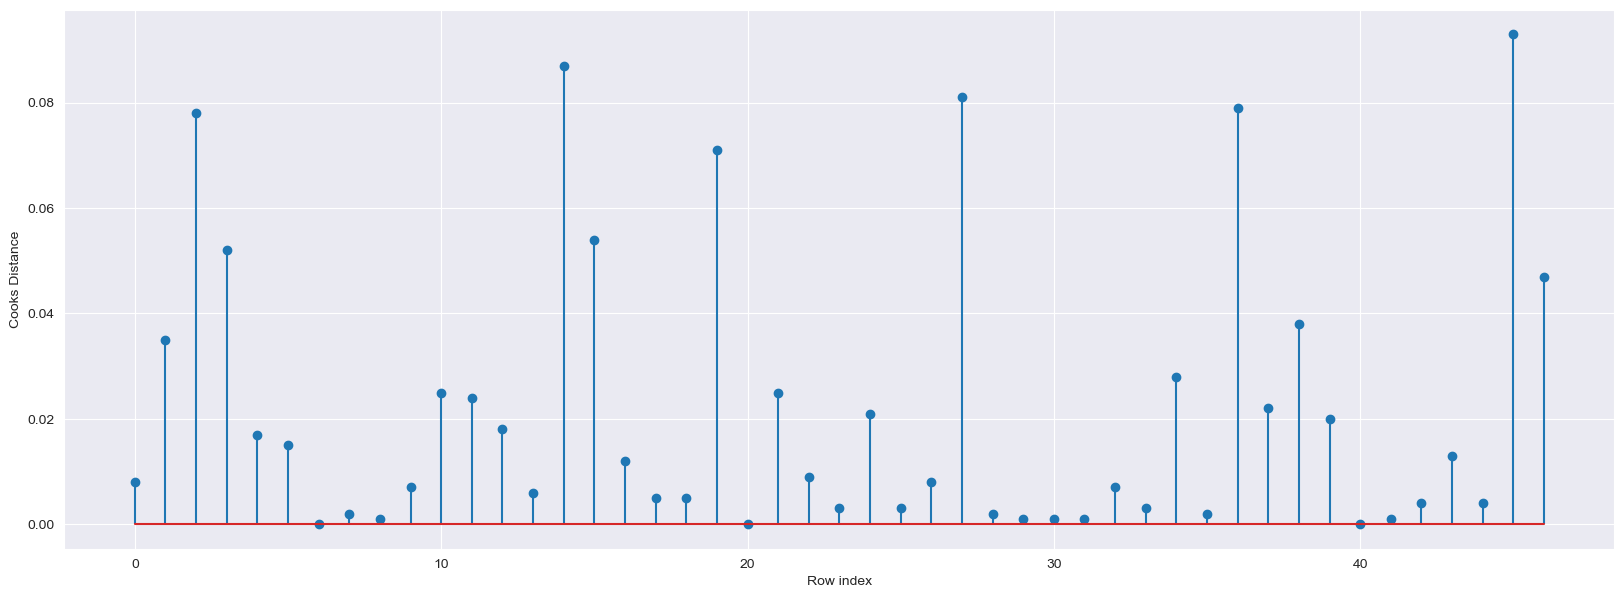

In [42]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup6)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [43]:
(np.argmax(c_V),np.max(c_V)) 

(45, 0.0928337320509411)

In [44]:
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [45]:
final_ml_V.predict(new_data) 

0    110448.25353
dtype: float64

In [46]:
final_ml_V.predict(new_data.iloc[0:5,])

0    110448.25353
dtype: float64

In [47]:
pred_y = final_ml_V.predict(new_data)

In [48]:
pred_y

0    110448.25353
dtype: float64